In [41]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import random
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [42]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [43]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (2000, 30000)
shape of Y_train:  (2000,)
shape of X_test:  (400, 30000)
shape of Y_test:  (400,)


In [44]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test),100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [45]:
X_train = X_train/255.0
X_test = X_test/255.0

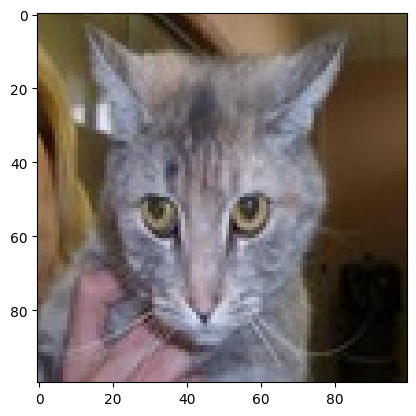

In [46]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [47]:
model = Sequential([
    # Conv2D(# of filters, size of the filter, activation function, input shape expectation of model)
    Conv2D(32,(3,3),activation='relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    # Dense(# of neurons in the first layer, )
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # since binary
])

In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# if we don't compile and just keep running fit it will resume the training
model.fit(X_train,Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.9299 - loss: 0.2024
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 0.9492 - loss: 0.1563
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.9609 - loss: 0.1276
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 471ms/step - accuracy: 0.9716 - loss: 0.0916
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.9859 - loss: 0.0697


In [52]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7083 - loss: 1.1259


[1.1448787450790405, 0.6725000143051147]

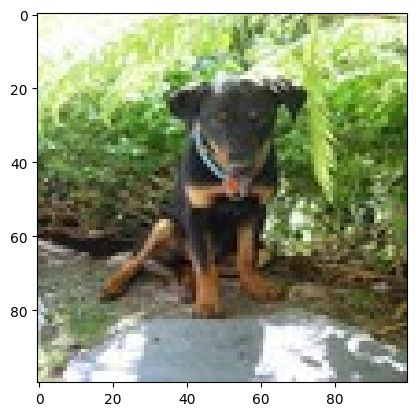

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
dog


In [56]:
# making predictions from test dataset

idx_2 = random.randint(0,len(X_test))
plt.imshow(X_test[idx_2,:])
plt.show()

y_pred = model.predict(X_test[idx_2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    print('dog')
else:
    print('cat')